In [8]:
# Imports
import glob
import pandas as pd
import numpy as np
from omegaconf import OmegaConf
import matplotlib.pyplot as plt
import uproot

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
# Load data
conf = OmegaConf.load('config/config.yaml')
data = uproot.concatenate('data/lrsm.root', library='pd')
print(data.keys())

Index(['weight', 'eTmiss', 'lep1_pT', 'lep2_pT', 'dilep_pT', 'jet1_pT',
       'jet2_pT', 'dijet_pT', 'HT', 'mjj', 'mll', 'mlljj', 'ml1jj', 'ml2jj',
       'delta_rap_jj', 'delta_rap_ll', 'rap1', 'rap2', 'delta_phi_jj',
       'delta_phi_ll', 'delta_R_jj', 'delta_R_ll', 'delta_R_lljj', 'njets',
       'external_params[0]', 'external_params[1]'],
      dtype='object')


In [13]:
from models import MultiDimGMM

multidim_gmm = MultiDimGMM(conf)

multidim_gmm.fit(data)

Epoch 1/100
296/296 [==============================] - ETA: 0s - loss: 8.0996e-05

296/296 [==============================] - 25s 62ms/step - loss: 8.0996e-05 - val_loss: 5.1594e-05 - lr: 0.0010
Epoch 2/100
295/296 [============================>.] - ETA: 0s - loss: 5.3860e-05

296/296 [==============================] - 9s 31ms/step - loss: 5.3861e-05 - val_loss: 3.3638e-05 - lr: 0.0010
Epoch 3/100
296/296 [==============================] - ETA: 0s - loss: 4.7118e-05

296/296 [==============================] - 9s 31ms/step - loss: 4.7118e-05 - val_loss: 3.2076e-05 - lr: 0.0010
Epoch 4/100
295/296 [============================>.] - ETA: 0s - loss: 4.4436e-05

296/296 [==============================] - 10s 33ms/step - loss: 4.4436e-05 - val_loss: 3.1467e-05 - lr: 0.0010
Epoch 5/100
295/296 [============================>.] - ETA: 0s - loss: 4.3400e-05

296/296 [==============================] - 9s 32ms/step - loss: 4.3399e-05 - val_loss: 3.1243e-05 - lr: 7.5000e-04
Epoch 6/100
295/296 [===

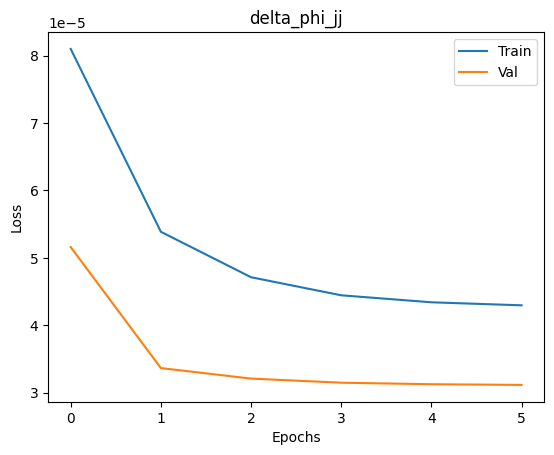

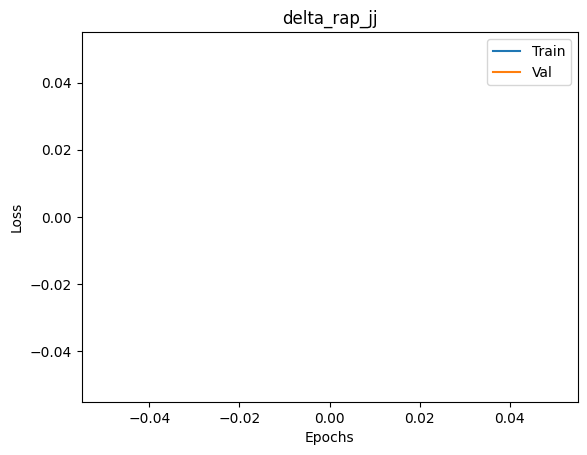

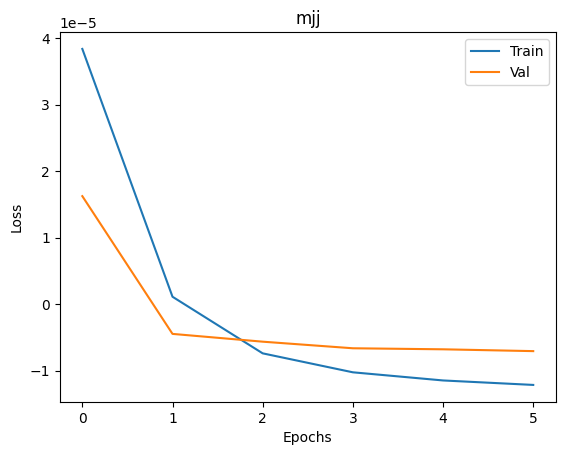

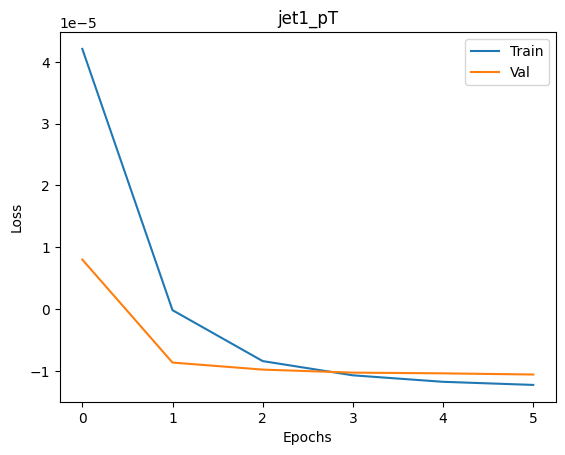

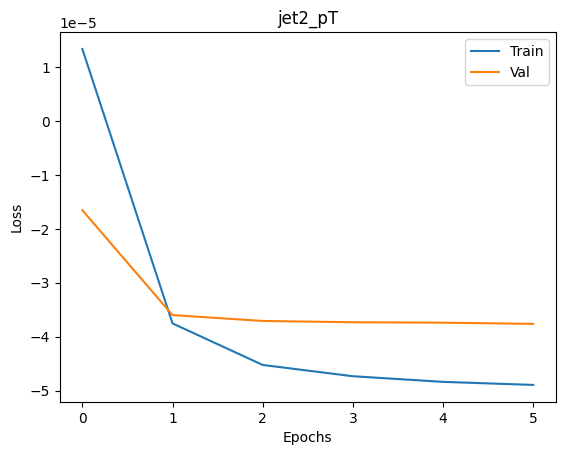

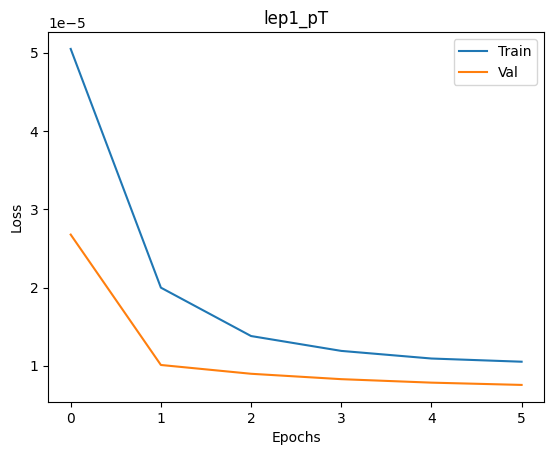

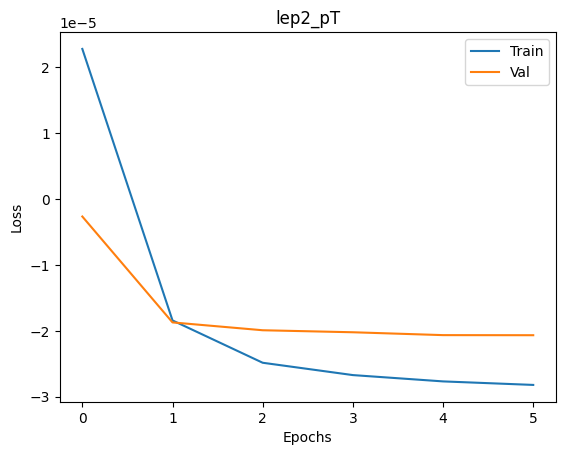

In [14]:
for obs, history in multidim_gmm.model_histories.items():
    # Plot loss vs epochs
    fig, ax = plt.subplots();
    ax.plot(history.history['loss'], label='Train');
    ax.plot(history.history['val_loss'], label='Val');
    ax.set_xlabel("Epochs");
    ax.set_ylabel("Loss");
    ax.set_title(obs)
    ax.legend();